In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [82]:
# READ DATA
data = pd.read_excel("Heart Disease.xlsx") 

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [83]:
import statsmodels.formula.api as sm
import statsmodels.api as sma

credittrain, credittest = train_test_split(data, train_size=0.70, random_state=1)
mylogit = sm.glm(formula = "target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal", data = data, family = sma.families.Binomial()).fit()
print(mylogit.summary())

Xtrain = credittrain[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
Ytrain = credittrain[['target']]

Xtest = credittest[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
Ytest = credittest['target']

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  303
Model:                            GLM   Df Residuals:                      289
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.19
Date:                Tue, 05 Jul 2022   Deviance:                       210.39
Time:                        13:55:50   Pearson chi2:                     276.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4960
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4863      2.854     -2.623      0.0

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(Xtrain)
rescaledX_test = scaler.fit_transform(Xtest)

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(rescaledX_train, Ytrain)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [86]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, Ytest))

Accuracy of logistic regression classifier:  0.8681318681318682


In [89]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
rescaledX_train = sc.fit_transform(Xtrain)
rescaledX_test = sc.transform(Xtest)

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(rescaledX_train, Ytrain)
print(regressor.summary())
y_pred = regressor.predict(Xtest)

cm = confusion_matrix(Ytest, prediction)
print("Confusion Matrix (logreg): \n", cm)
print("Test accuracy =", accuracy_score(Ytest, prediction))
print("Accuracy of random forest classifier: ", metrics.accuracy_score(Ytest, ypred))

Confusion Matrix (logreg): 
 [[11 38]
 [ 0 42]]
Test accuracy = 0.5824175824175825
Accuracy of random forest classifier:  0.8681318681318682


/var/folders/z8/4h6pp1j10p9_rpsf5bs0rp5m0000gn/T/ipykernel_53071/1760902289.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(rescaledX_train, Ytrain)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [69]:
# feature importance
headers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
feature_imp = pd.Series(clf.feature_importances_, index = headers).sort_values(ascending = False)
feature_imp

oldpeak     0.142496
cp          0.121790
thal        0.115181
thalach     0.107447
ca          0.094228
chol        0.088314
age         0.079278
trestbps    0.078863
exang       0.057703
slope       0.044676
sex         0.039820
restecg     0.020270
fbs         0.009934
dtype: float64

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(data)

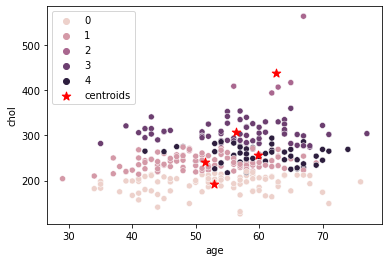

In [36]:
sns.scatterplot(data=data, x='age', y='chol', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,4], 
            marker="*", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
# https://www.reneshbedre.com/blog/kmeans-clustering-python.html

In [ ]:
# https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/